<a href="https://colab.research.google.com/github/su-dipta/python_basics/blob/main/read_write_nd_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

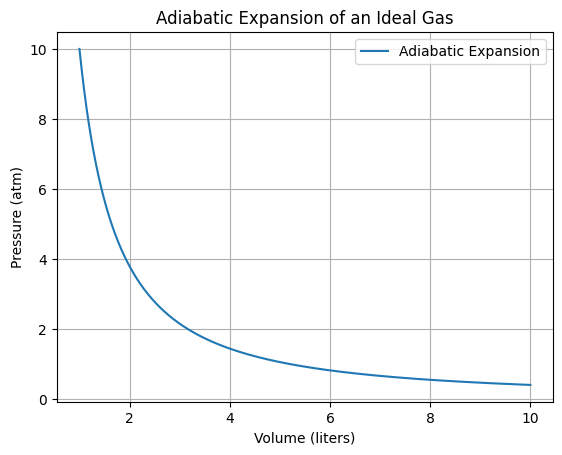

In [ ]:
import numpy as np
import matplotlib.pyplot as plt




# Constants
gamma = 1.4  # Adiabatic index (for air)

# Initial conditions
P1 = 10.0  # Initial pressure (in atmospheres)
V1 = 1.0   # Initial volume (in liters)

# Define the range of volumes during expansion
V_values = np.linspace(V1, 10 * V1, 1000)

# Calculate the corresponding pressures using the adiabatic process equation
P_values = P1 * (V1 / V_values) ** gamma

# Plotting
plt.plot(V_values, P_values, label='Adiabatic Expansion')
plt.xlabel('Volume (liters)')
plt.ylabel('Pressure (atm)')
plt.title('Adiabatic Expansion of an Ideal Gas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
a = np.linspace(0,9,10)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
matrix1 = np.random.randint((10,8))

In [ ]:
import numpy as np

# Define matrices A and B
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Perform matrix multiplication
C = np.dot(A, B)

# Write the multiplied matrix to a file
output_file = 'result_matrix.txt'
np.savetxt(output_file, C, fmt='%d', delimiter=', ')

print(f"Matrix multiplication result saved to '{output_file}'")


with open('output.txt', 'w') as f:
    f.write(str(C))

Matrix multiplication result saved to 'result_matrix.txt'


In [ ]:
mat1 = np.random.randint(1,10,size=(3,3))
mat2 = np.random.randint(1,20,size=(3,3))

mat3 = np.matmul(mat1, mat2)

output_file = 'result_matrix.txt'
np.savetxt(output_file, mat3, fmt='%d', delimiter=', ')

with open('output.txt', 'w') as f:
    f.write(str(mat3))

"with open('output.txt', 'w') as f:\n    f.write(str(mat3))"

In [ ]:
mat1 = np.random.randint(1,10,size=(3,3))
mat2 = np.random.randint(1,20,size=(3,3))

np.savetxt('mat1.txt', mat1, fmt='%d')
np.savetxt('mat2.txt', mat2, fmt='%d')

readmat1 = np.loadtxt('mat1.txt')
readmat2 = np.loadtxt('mat2.txt')

print(readmat1)
print(readmat2)

[[7. 9. 6.]
 [5. 3. 9.]
 [7. 8. 2.]]
[[ 2.  2. 13.]
 [ 2. 16.  3.]
 [18. 17.  9.]]


In [ ]:
def write_matrix_to_file(matrix, file_path):
        # Open the file in write mode
        with open(file_path, 'w') as file:
            # Write the matrix elements to the file
            for row in matrix:
                # Join the elements of each row with a space and write to the file
                file.write(' '.join(map(str, row)) + '\n')
        print(f"Matrix successfully saved to '{file_path}'.")


# Example usage
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
file_path = './matrix.txt'
write_matrix_to_file(matrix, file_path)

Matrix successfully saved to './matrix.txt'.


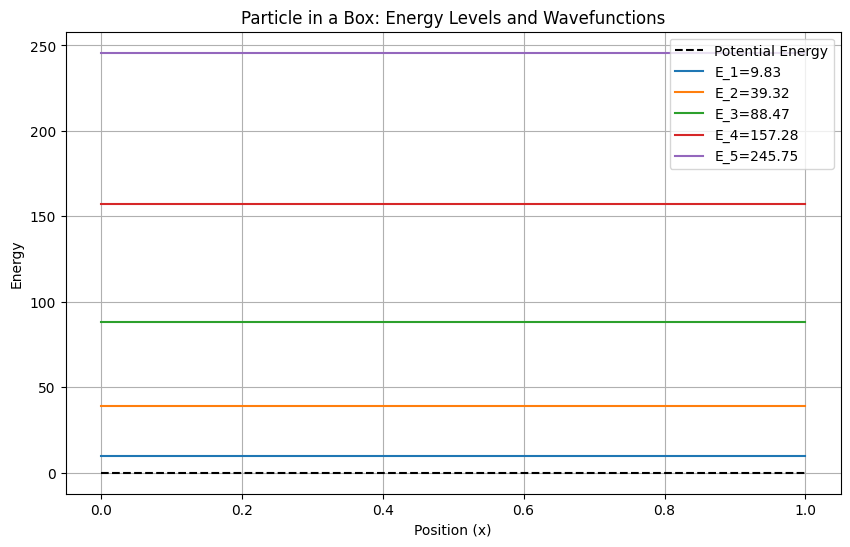

In [ ]:


def solve_particle_in_box(L, n_points):
    x = np.linspace(0, L, n_points)  # Define the spatial grid
    dx = x[1] - x[0]  # Grid spacing
    V = np.zeros_like(x)  # Potential energy (box, so V=0 inside)

    # Construct the Hamiltonian matrix using finite differences
    H = np.zeros((n_points, n_points))
    for i in range(n_points):
        H[i, i] = 2 / dx**2 + V[i]  # Diagonal elements
        if i > 0:
            H[i, i - 1] = -1 / dx**2  # Off-diagonal elements
        if i < n_points - 1:
            H[i, i + 1] = -1 / dx**2

    # Solve the eigenvalue problem for the Hamiltonian matrix
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    return x, eigenvalues, eigenvectors

# Parameters
L = 1  # Box length
n_points = 1000  # Number of spatial points

# Solve the particle in a box problem
x, eigenvalues, eigenvectors = solve_particle_in_box(L, n_points)

# Plot the energy levels and wavefunctions
plt.figure(figsize=(10, 6))

# Plot the potential energy
plt.plot(x, np.zeros_like(x), 'k--', label='Potential Energy')

# Plot the first few energy levels
for i in range(5):
    plt.plot(x, eigenvalues[i] + np.abs(eigenvectors[:, i])**2, label=f'E_{i+1}={eigenvalues[i]:.2f}')

plt.xlabel('Position (x)')
plt.ylabel('Energy')
plt.title('Particle in a Box: Energy Levels and Wavefunctions')
plt.legend()
plt.grid(True)
plt.show()


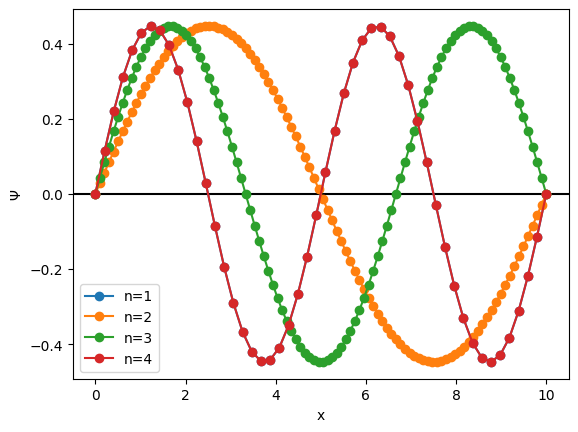

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pib(L,n,x):
    y = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)
    return y

points = np.linspace(0,10,50)
l = 10
n = 4
with open('./n1', 'w') as file:
    for i in points:
        wf = pib(l,n,i)
        file.write(str(i)+ "  "+ str(wf)+'\n')

datn1 = np.loadtxt('./n1')
datn2 = np.loadtxt('./n2')
datn3 = np.loadtxt('./n3')
datn4 = np.loadtxt('./n4')

xn1 = datn1[:,0]
yn1 = datn1[:,1]

xn2 = datn2[:,0]
yn2 = datn2[:,1]

xn3 = datn3[:,0]
yn3 = datn3[:,1]

xn4 = datn4[:,0]
yn4 = datn4[:,1]

plt.axhline(0,color='k')
plt.plot(xn1,yn1,'o-',label='n=1')
plt.plot(xn2,yn2,'o-',label='n=2')
plt.plot(xn3,yn3,'o-',label='n=3')
plt.plot(xn4,yn4,'o-',label='n=4')


plt.legend()

plt.ylabel(r'$\Psi$')
plt.xlabel('x')
plt.show()

In [ ]:
import numpy as np

# Step 1: Define a 10x8 random matrix with integers
matrix1 = np.random.randint(1, 10, size=(10, 8))

# Step 2: Write matrix1 to a file named original_mat.txt
np.savetxt('original_mat.txt', matrix1, fmt='%d')

# Step 3: Define another random 8x10 matrix
matrix2 = np.random.randint(1, 10, size=(8, 10))

# Step 4: Write matrix2 to a file named original_mat2.txt
np.savetxt('original_mat2.txt', matrix2, fmt='%d')

# Step 5: Multiply both matrices and write down sum of each row of the multiplied matrix
multiplied_matrix = np.dot(matrix1, matrix2)
sum_of_rows = np.sum(multiplied_matrix, axis=1)
np.savetxt('sum_of_row.txt', sum_of_rows, fmt='%d')

# Step 6: Calculate trace of the multiplied matrix
trace = np.trace(multiplied_matrix)

# Read sums from the file "sum_of_row.txt" and check if trace is greater than any number
with open('sum_of_row.txt', 'r') as file:
    sums = [int(line.strip()) for line in file]
    greater_sums = [s for s in sums if trace > s]

# Print the greater sums
if greater_sums:
    print("Trace is greater than the following sums:", greater_sums)
else:
    print("Trace is not greater than any sum.")


Trace is greater than the following sums: [1897, 1790, 1720, 1906, 1345, 1921]


In [ ]:
import numpy as np

def generate_and_write_matrix(filename, shape):
    matrix = np.random.randint(1, 10, size=shape)
    np.savetxt(filename, matrix, fmt='%d')
    return matrix

def multiply_matrices_and_write_sums(matrix1, matrix2, filename):
    multiplied_matrix = np.dot(matrix1, matrix2)
    sum_of_rows = np.sum(multiplied_matrix, axis=1)
    np.savetxt(filename, sum_of_rows, fmt='%d')
    return multiplied_matrix, sum_of_rows

def calculate_trace_and_check(trace, filename):
    with open(filename, 'r') as file:
        sums = [int(line.strip()) for line in file]
        greater_sums = [s for s in sums if trace > s]
    return greater_sums

# Step 1: Generate and write the first matrix
matrix1 = generate_and_write_matrix('original_mat.txt', (10, 8))

# Step 3: Generate and write the second matrix
matrix2 = generate_and_write_matrix('original_mat2.txt', (8, 10))

# Step 5: Multiply matrices and write sums of rows
multiplied_matrix, sum_of_rows = multiply_matrices_and_write_sums(matrix1, matrix2, 'sum_of_row.txt')

# Step 6: Calculate trace and check against sums
trace = np.trace(multiplied_matrix)
greater_sums = calculate_trace_and_check(trace, 'sum_of_row.txt')

# Print the greater sums
if greater_sums:
    print("Trace is greater than the following sums:", greater_sums)
else:
    print("Trace is not greater than any sum.")


Trace is greater than the following sums: [1834, 1636, 1964, 1898, 1967, 1748, 1951]
